In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from evalutation.plotting.plotting import PLOTTER
from data_prep.data_preparation import DATA_PREP
from data_loader.lfp_loader import LFP_LOADER

Epiphyte Tube version loaded.
Connecting fkaltenberger@134.2.168.111:3306


In [2]:
pltr = PLOTTER()

<Figure size 774x270 with 0 Axes>

In [3]:
b = 1
n_weights = 10
c = (n_weights,1)
splits = [1,2,3,4,5]
#n_weights += 1

#path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
#path_sklearn = "../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_25-14_18_11/"
alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1.0]

#channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 14, 14, 14, 14, 16, 16, 36, 36, 40]
channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 16, 16, 36, 36, 40, 57, 57, 57, 58, 58, 58, 59, 60, 61, 61, 61, 63, 63, 64, 79, 79, 79, 80, 80, 80]
#units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 38, 39, 40, 41, 44, 45, 69, 70, 83]
units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 44, 45, 69, 70, 83, 96, 97, 98, 101, 102, 103, 107, 112, 116, 117, 118, 125, 126, 129, 142, 143, 144, 150, 151, 152]
n_channels = len(channels)
n_splits = len(splits)
n_units = len(units)

In [4]:
trials = []
thetas = []
for a in alphas: 
    csc = "5-40"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    csc = "57-80"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    
    L1_trial_df = pd.DataFrame({
        "costs" : np.mean([L1_trial_df1.costs, L1_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L1_trial_df1.theta.values.tolist()), 
             np.array(L1_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L1_trial_df1.losses.values.tolist()), 
             np.array(L1_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L1_trial_df1.preds.values.tolist()), 
             np.array(L1_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L2_trial_df = pd.DataFrame({
        "costs" : np.mean([L2_trial_df1.costs, L2_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L2_trial_df1.theta.values.tolist()), 
             np.array(L2_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L2_trial_df1.losses.values.tolist()), 
             np.array(L2_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L2_trial_df1.preds.values.tolist()), 
             np.array(L2_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L1_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L1_trial_df["losses"].values.tolist()).flatten(), 
        "costs [NLL]" : np.array(L1_trial_df["preds"].values.tolist()).flatten(), 
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L1"
    })
    
    L2_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L2_trial_df["losses"].values.tolist()).flatten(), 
        "costs [NLL]" : np.array(L2_trial_df["preds"].values.tolist()).flatten(), 
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L2"
    })
    
    L1_theta_exp_df = pd.DataFrame({
        "weight values" : np.array(L1_trial_df.theta.values.tolist())[:,:,-n_weights:].flatten(),  
        "time before spike [$ms$]" : np.array(list(range(-n_weights, 0)) * n_channels * n_splits), 
        "splits" : np.repeat(np.array(splits), n_channels*n_weights),
        "unit" : np.repeat(np.array(units * n_splits), n_weights),
        "channel" : np.repeat(np.array(channels * n_splits), n_weights),
        "alpha" : a, 
        "regularization" : "L1"
    })
    
    L2_theta_exp_df = pd.DataFrame({
        "weight values" : np.array(L2_trial_df.theta.values.tolist())[:,:,-n_weights:].flatten(),  
        "time before spike [$ms$]" : np.array(list(range(-n_weights, 0)) * n_channels * n_splits), 
        "splits" : np.repeat(np.array(splits), n_channels*n_weights),
        "unit" : np.repeat(np.array(units * n_splits), n_weights),
        "channel" : np.repeat(np.array(channels * n_splits), n_weights),
        "alpha" : a, 
        "regularization" : "L2"
    })
    
    trial_exp_df = pd.concat([L1_trial_exp_df, L2_trial_exp_df], ignore_index=True)
    theta_exp_df = pd.concat([L1_theta_exp_df, L2_theta_exp_df], ignore_index=True)
    
    trials.append(trial_exp_df)
    thetas.append(theta_exp_df)

exp_df = pd.concat(trials, ignore_index=True)
theta_df = pd.concat(thetas, ignore_index=True)
theta_df.head()

,weight values,time before spike [$ms$],splits,unit,channel,alpha,regularization
0,0.151252,-10,1,8,5,0.0,L1
1,-0.052884,-9,1,8,5,0.0,L1
2,-0.070560,-8,1,8,5,0.0,L1
3,-0.065578,-7,1,8,5,0.0,L1
4,-0.079148,-6,1,8,5,0.0,L1


In [15]:
list(range(-n_weights, 0))

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]

In [5]:
als = {}
for u in units:
    a = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=1).argmin()
    l = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=0).argmin()
    #print(u, l, alphas[a])
    #ls = f"L{l+1}" if a>0.0 else "--"
    als.update({f"{u}": [l, alphas[a]]})
#als = np.array(als)
print(als)

{'8': [0, 0.0], '9': [0, 0.0], '10': [0, 0.0], '12': [0, 0.0], '17': [0, 0.0], '23': [0, 0.0], '26': [0, 0.0], '29': [0, 0.0], '31': [1, 0.0], '32': [1, 0.0], '33': [0, 0.0], '44': [0, 0.0], '45': [0, 0.0], '69': [0, 0.0004], '70': [0, 0.0002], '83': [0, 0.0], '96': [0, 0.0], '97': [0, 0.0001], '98': [0, 0.0], '101': [0, 0.0001], '102': [0, 0.0], '103': [0, 0.0], '107': [0, 0.0], '112': [0, 0.0001], '116': [0, 0.0001], '117': [0, 0.0], '118': [0, 0.0], '125': [0, 0.0001], '126': [0, 0.0], '129': [0, 0.0], '142': [0, 0.0], '143': [0, 0.0], '144': [0, 0.0], '150': [0, 0.0], '151': [0, 0.0], '152': [0, 0.0]}


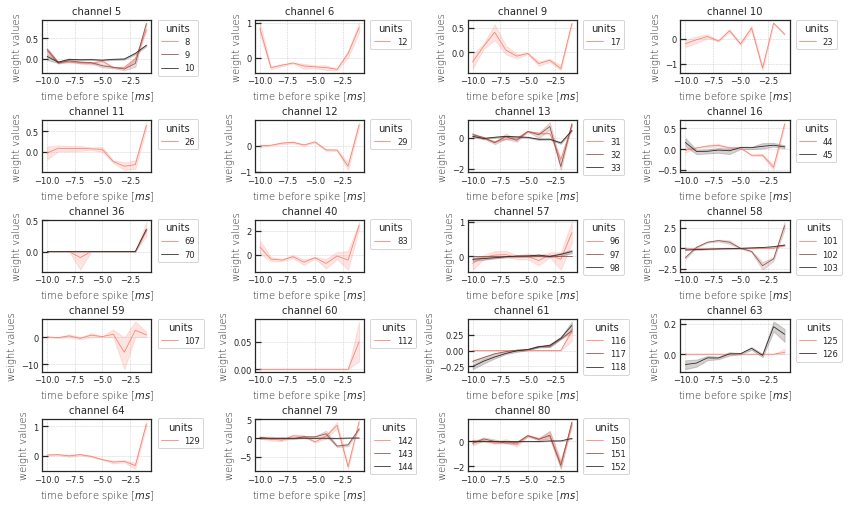

In [6]:
fig6, axs = pltr.plot_best_theta(theta_df, channels, als)
fig6.delaxes(ax=axs[4,3])

plt.subplots_adjust(
    left=0.05, right=0.915, bottom=0.065, top=0.96
)

fig6.savefig('plots/plot6.png')
fig6.savefig('plots/plot6.pdf')

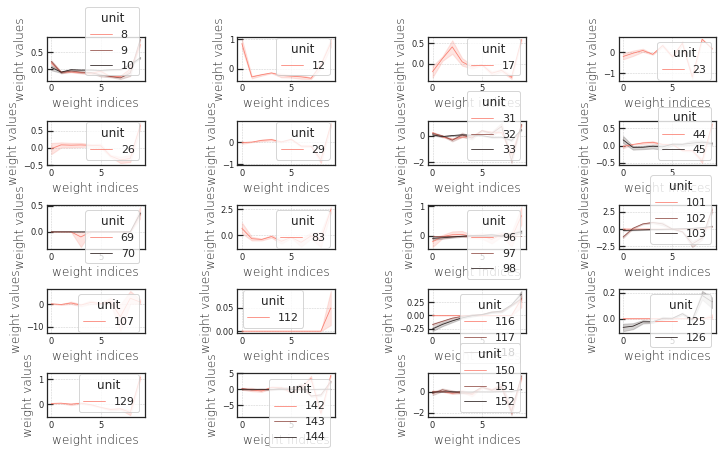

In [180]:
best_costs=als

## set up frame for data ##
rows = 5
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

csc_set = list(set(channels))
n_csc = len(csc_set)

for i in range(n_csc): 
    
    k = i // 4
    j = i % 4
    
    ## fig prep ##
    axs[k,j].grid(linewidth=0.5, linestyle="dashed", zorder=0)
    axs[k,j].tick_params(
            direction = "in", 
            bottom = False, top = False,
            left = True, right = False,
            zorder = 1
    )

    axs[k,j].set_xlabel('', fontweight='light')#, fontsize=self.label_font_size)
    axs[k,j].set_ylabel('', fontweight='light')#, fontsize=self.label_font_size)
    
    c = csc_set[i]
    
    x_c = theta_df.iloc[np.array(theta_df.channel==c)]
    xs_u = []
    for u in set(x_c.unit.tolist()):
        l, alpha = best_costs[f"{u}"]
        x_u = x_c.iloc[np.array(x_c.unit==u)]
        x_u = x_u.iloc[np.array(x_u.alpha==alpha)]
        x_u = x_u.iloc[np.array(x_u.regularization==f"L{l+1}")]
        xs_u.append(x_u)
    xs = pd.concat(xs_u)
    sns.lineplot(ax=axs[k,j], data=xs, y="weight values", x="weight indices", hue="unit", palette="dark:salmon_r")

if j<cols-1: 
    fig.delaxes(ax=axs[4,3])
plt.subplots_adjust(hspace=0.9, wspace=0.95)
    

In [53]:
exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2)

array([[0.00192777, 0.00192777],
       [0.00194989, 0.00232661],
       [0.00199177, 0.00282269],
       [0.00204664, 0.00331444],
       [0.00210974, 0.00379531],
       [0.00217851, 0.00426553],
       [0.00225145, 0.00472556],
       [0.00232758, 0.00517624],
       [0.00240622, 0.00561815],
       [0.00248689, 0.00605269],
       [0.00256924, 0.00648045],
       [0.01113463, 0.03470423],
       [0.10067031, 0.1750357 ],
       [1.        , 0.56733754]])

In [59]:
print(exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=1).min())
print(exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=0).min())

0.0019277659446347837
0.0019277659446347837


In [61]:
print(units)

[8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 44, 45, 69, 70, 83, 96, 97, 98, 101, 102, 103, 107, 112, 116, 117, 118, 125, 126, 129, 142, 143, 144, 150, 151, 152]


In [142]:
als = {}
for u in units:
    a = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=1).argmin()
    l = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=0).argmin()
    #print(u, l, alphas[a])
    #ls = f"L{l+1}" if a>0.0 else "--"
    als.update({f"{u}": [l, alphas[a]]})
#als = np.array(als)
print(als)

{'8': [0, 0.0], '9': [0, 0.0], '10': [0, 0.0], '12': [0, 0.0], '17': [0, 0.0], '23': [0, 0.0], '26': [0, 0.0], '29': [0, 0.0], '31': [1, 0.0], '32': [1, 0.0], '33': [0, 0.0], '44': [0, 0.0], '45': [0, 0.0], '69': [0, 0.0004], '70': [0, 0.0002], '83': [0, 0.0], '96': [0, 0.0], '97': [0, 0.0001], '98': [0, 0.0], '101': [0, 0.0001], '102': [0, 0.0], '103': [0, 0.0], '107': [0, 0.0], '112': [0, 0.0001], '116': [0, 0.0001], '117': [0, 0.0], '118': [0, 0.0], '125': [0, 0.0001], '126': [0, 0.0], '129': [0, 0.0], '142': [0, 0.0], '143': [0, 0.0], '144': [0, 0.0], '150': [0, 0.0], '151': [0, 0.0], '152': [0, 0.0]}


In [ ]:
exp_df

In [28]:
for u in units:
    best_r = exp_df["losses [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).argmin()
    best_l = alphas[exp_df["losses [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=1).min()]
    best_a = alphas[exp_df["losses [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=1).argmin()]
    print(f"TRAINING: Best regularization for unit {u}: \n\tL{best_r+1} with alpha {best_a}")
    
    best_r = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).argmin()
    best_c = alphas[exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=1).min()]
    best_a = alphas[exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=1).argmin()]
    print(f"VALIDATION: Best regularization for unit {u}: \n\tL{best_r+1} with alpha {best_a}")

TRAINING: Best regularization for unit 8: 
	L2 with alpha 0.0004
VALIDATION: Best regularization for unit 8: 
	L1 with alpha 0.0001
TRAINING: Best regularization for unit 9: 
	L2 with alpha 0.0
VALIDATION: Best regularization for unit 9: 
	L1 with alpha 0.0001
TRAINING: Best regularization for unit 10: 
	L2 with alpha 0.0001
VALIDATION: Best regularization for unit 10: 
	L1 with alpha 0.0004
TRAINING: Best regularization for unit 12: 
	L2 with alpha 0.0001
VALIDATION: Best regularization for unit 12: 
	L1 with alpha 0.0004
TRAINING: Best regularization for unit 17: 
	L1 with alpha 0.0004
VALIDATION: Best regularization for unit 17: 
	L1 with alpha 0.0002
TRAINING: Best regularization for unit 23: 
	L1 with alpha 0.0001
VALIDATION: Best regularization for unit 23: 
	L1 with alpha 0.0004
TRAINING: Best regularization for unit 26: 
	L1 with alpha 0.0
VALIDATION: Best regularization for unit 26: 
	L1 with alpha 0.0001
TRAINING: Best regularization for unit 29: 
	L2 with alpha 0.0
VALIDATIO

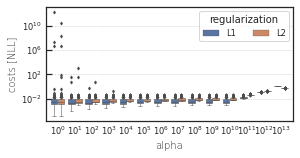

In [5]:
fig3, ax = pltr.plot_reg_losses_bp(exp_df)

#print(ax.get_xticklabels())
xticks = ax.get_xticks()
xticklabels = [f'$10^{{{int(i)}}}$' if i!=-10.0 else '0.0' for i in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)


plt.semilogy()
#plt.semilogx()

plt.subplots_adjust(
    left=0.13, bottom=0.2, right=0.99, top=0.99
)
fig3.savefig('plots/plot5.png')
fig3.savefig('plots/plot5.pdf')